In [15]:
data_folder = "g:/SpineUs/TestingData_sc_0_128_Slices"
config_file = "C:/Users/Tamas/OneDrive/Data/SpineUs/train_AttUNet_DiceCE.yaml"

from torch.utils.data import DataLoader
from torchvision import transforms
from UltrasoundDataset import UltrasoundDataset
import matplotlib.pyplot as plt
import numpy as np
import yaml

from monai import transforms
from monai.transforms import Compose

with open(config_file, "r") as f:
    config = yaml.safe_load(f)

# Create transforms
train_transform_list = []
val_transform_list = []
if config["transforms"]["general"]:
    for tfm in config["transforms"]["general"]:
        try:
            train_transform_list.append(
                getattr(transforms, tfm["name"])(**tfm["params"])
            )
            val_transform_list.append(
                getattr(transforms, tfm["name"])(**tfm["params"])
            )
        except KeyError:  # Apply transform to both image and label by default
            train_transform_list.append(
                getattr(transforms, tfm["name"])(keys=["image", "label"])
            )
            val_transform_list.append(
                getattr(transforms, tfm["name"])(keys=["image", "label"])
            )
if config["transforms"]["train"]:
    for tfm in config["transforms"]["train"]:
        try:
            train_transform_list.append(
                getattr(transforms, tfm["name"])(**tfm["params"])
            )
        except KeyError:
            train_transform_list.append(
                getattr(transforms, tfm["name"])(keys=["image", "label"])
            )
train_transform = Compose(train_transform_list)
val_transform = Compose(val_transform_list)

In [16]:
# Load the dataset

dataset = UltrasoundDataset(data_folder, transform=train_transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Get a batch of data

print(f"data_folder: {data_folder}")
print(f"Number of images: {len(dataset)}")

data_folder: g:/SpineUs/TrainingData_sc_0_128_Slices
Number of images: 2565


In [17]:

# Get the first batch
batch = next(iter(dataloader))
print(f"batch length = {len(batch)}")
# print keys of bath dictionary
print(f"batch keys = {batch.keys()}")

print(f"batch[0].shape = {batch['image'].shape}")
print(f"batch[1].shape = {batch['label'].shape}")
print(f"batch[2].shape = {batch['transform'].shape}")


batch length = 3
batch keys = dict_keys(['image', 'label', 'transform'])
batch[0].shape = torch.Size([32, 1, 128, 128])
batch[1].shape = torch.Size([32, 1, 128, 128])
batch[2].shape = torch.Size([32, 4, 4])


sample_indices = [ 4 18 13 27 17]


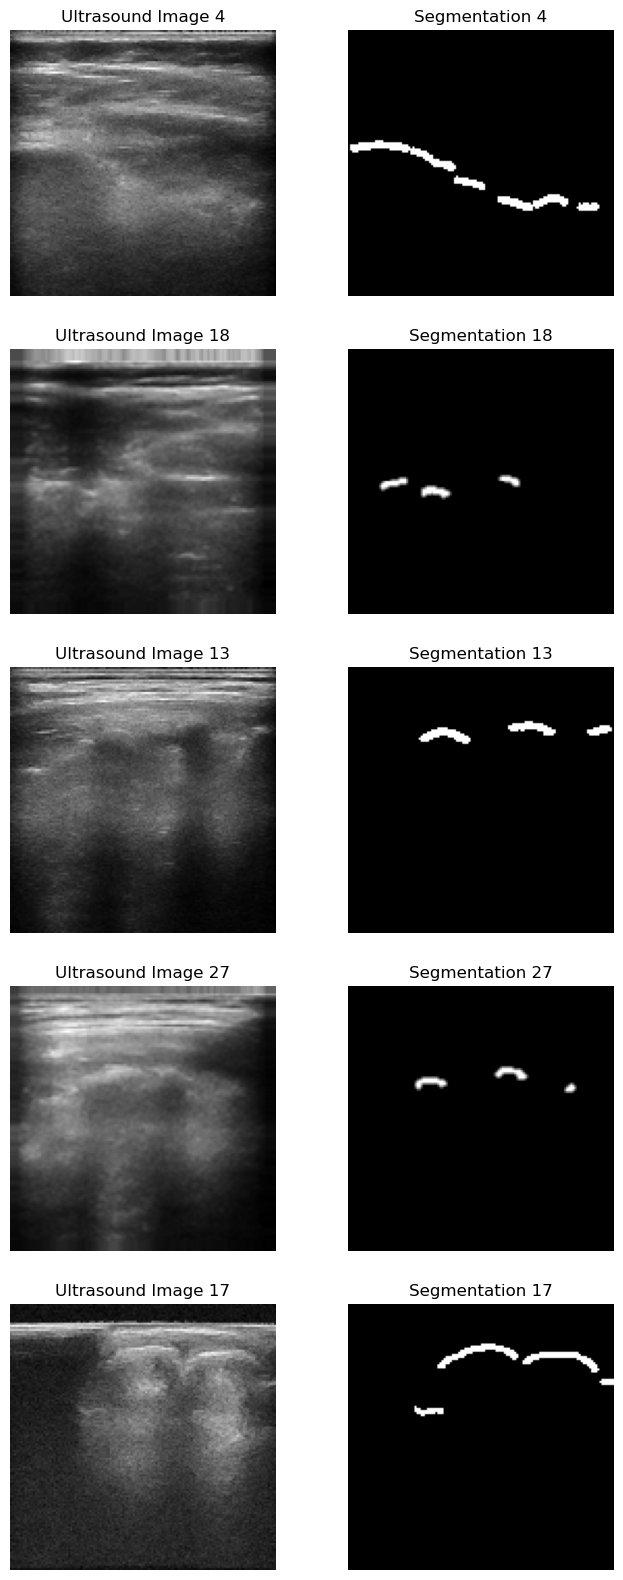

In [18]:
num_samples = 5

# Show a num_samples random images and their segmentations from the first batch. Ultrasound images should be in the left column, segmentations in the right column.

sample_indices = np.random.choice(len(batch['image']), num_samples, replace=False)
print(f"sample_indices = {sample_indices}")

plt.figure(figsize=(8, 4*num_samples))

for i, idx in enumerate(sample_indices):
    plt.subplot(num_samples, 2, 2*i + 1)
    plt.imshow(batch['image'][idx, 0], cmap='gray')
    plt.title(f"Ultrasound Image {idx}")
    plt.axis('off')
    plt.subplot(num_samples, 2, 2*i + 2)
    plt.imshow(batch['label'][idx, 0], cmap='gray')
    plt.title(f"Segmentation {idx}")
    plt.axis('off')

plt.show()


In [19]:
# Iterate through the dataset by batches and time how long it takes.

batch_size = 32

import time
import tqdm

start_time = time.time()
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)  # If shuffle=True, the time to iterate through the dataset will be longer
batch_counter = 0

# Use tqdm to show progress as we iterate through all batches of the dataloader

for batch in tqdm.tqdm(dataloader):
    batch_counter += 1
end_time = time.time()

print(f"Number of images in dataset: {len(dataset)}")
print(f"Batch size: {batch_size}")
print(f"Number of batches: {batch_counter}")
print(f"Time to iterate through the dataset: {end_time - start_time:.2f} seconds")

100%|██████████| 81/81 [01:01<00:00,  1.31it/s]

Number of images in dataset: 2565
Batch size: 32
Number of batches: 81
Time to iterate through the dataset: 61.68 seconds
